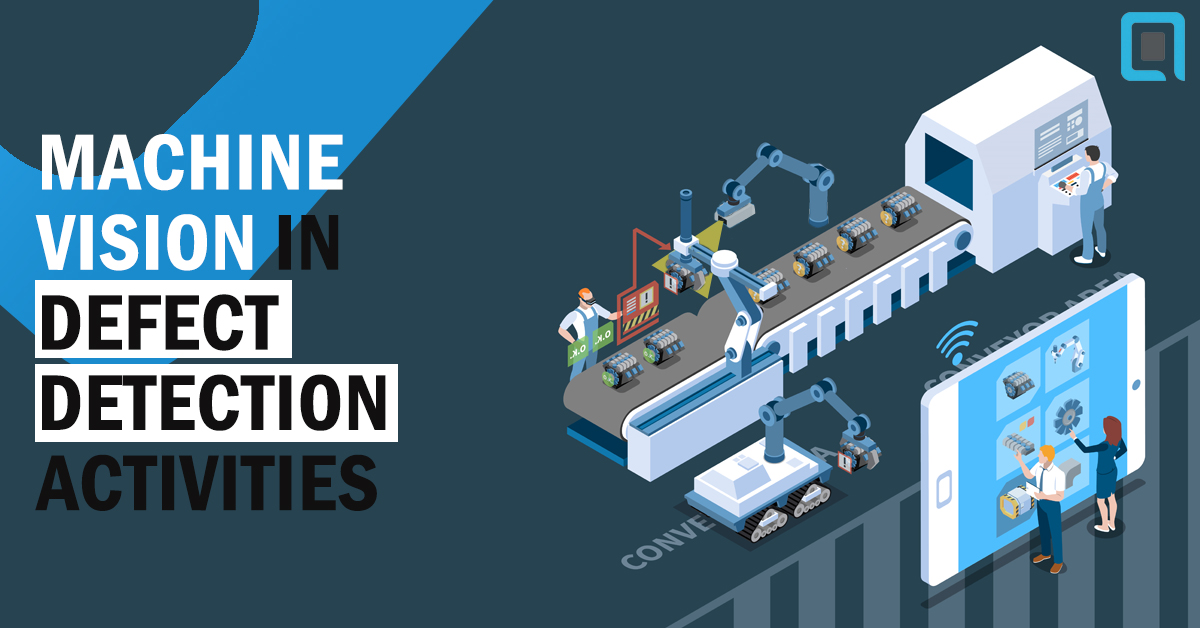

##**

   
### 1. **defects**:
   - **Type**: Categorical (Boolean - `True`/`False`)
   - **Description**: This is the target variable, indicating whether a software module or component has been identified as having a defect (`True` for defective, `False` for non-defective). This column is crucial for supervised machine learning models.
   
### 2. **WMC (Weighted Methods per Class)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the complexity of a class by counting the methods within the class and assigning weights based on complexity. High values can indicate more complex classes, which are generally harder to test and maintain, leading to a higher likelihood of defects.

### 3. **DIT (Depth of Inheritance Tree)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the depth of the inheritance hierarchy for a class. Greater depth can add complexity, as changes in parent classes may propagate through the hierarchy, increasing the risk of defects.

### 4. **NOC (Number of Children)**:
   - **Type**: Numerical (Float)
   - **Description**: Refers to the number of direct subclasses that inherit from a particular class. A high number of children may indicate that the class is too general or complex, which could lead to more errors in subclasses.

### 5. **CBO (Coupling Between Objects)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures how many other classes a class interacts with. High coupling makes classes more interdependent, leading to increased difficulty in maintaining the code and a higher risk of defects.

### 6. **RFC (Response for a Class)**:
   - **Type**: Numerical (Float)
   - **Description**: Represents the number of distinct methods that can potentially be executed in response to a message received by an object of that class. A higher value implies greater complexity, making the class more error-prone.

### 7. **LCOM (Lack of Cohesion of Methods)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the lack of cohesion between methods in a class. Low cohesion indicates that methods are not closely related, which could signify poor class design and a higher likelihood of defects.

### 8. **Ca (Afferent Couplings)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the number of classes that depend on a given class. If many other classes depend on a class, it becomes harder to modify without introducing defects.

### 9. **Ce (Efferent Couplings)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the number of classes that the given class depends on. High efferent coupling indicates that the class is reliant on many other classes, increasing the complexity and potential for defects.

### 10. **NPM (Number of Public Methods)**:
   - **Type**: Numerical (Float)
   - **Description**: Counts the number of public methods in a class. A high number of public methods can make a class more exposed and harder to test, increasing the risk of defects.

### 11. **LCOM3 (Improved LCOM)**:
   - **Type**: Numerical (Float)
   - **Description**: An alternative measure for Lack of Cohesion of Methods (LCOM). Similar to LCOM, it captures how cohesive or related the methods in a class are. A low score indicates good cohesion, while a high score may signal that the class is poorly designed.

### 12. **LOC (Lines of Code)**:
   - **Type**: Numerical (Float)
   - **Description**: The number of lines of code in the class or component. More lines of code usually suggest increased complexity and a higher likelihood of errors.

### 13. **DAM (Data Access Metric)**:
   - **Type**: Numerical (Float)
   - **Description**: Refers to the ratio of private (protected or hidden) attributes to total attributes in a class. Classes with higher encapsulation (higher DAM) tend to be more robust and maintainable, reducing the likelihood of defects.

### 14. **MOA (Measure of Aggregation)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures how many data members in a class are user-defined types. Higher aggregation might increase the complexity of the class and the potential for defects.

### 15. **MFA (Measure of Functional Abstraction)**:
   - **Type**: Numerical (Float)
   - **Description**: Reflects the extent to which methods of a class are inherited from its parents. A low MFA score suggests that the class defines many of its own methods, which may indicate higher complexity.

### 16. **CAM (Cohesion Among Methods)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures how similar the methods of a class are in terms of the parameter types they use. High cohesion among methods suggests that the class is focused and well-structured, which reduces the chances of defects.

### 17. **IC (Inheritance Coupling)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the number of parent classes a given class is dependent on. Higher inheritance coupling could indicate complexity, which may lead to a higher likelihood of defects.

### 18. **CBM (Coupling Between Methods)**:
   - **Type**: Numerical (Float)
   - **Description**: Refers to the number of new and inherited methods that are used by methods of the class. Higher CBM can indicate more interdependencies, increasing the chances of defects.

### 19. **AMC (Average Method Complexity)**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the average complexity of the methods in a class. Higher complexity in methods can lead to more defects since complex methods are harder to test and maintain.

### 20. **MaxInheritanceTree**:
   - **Type**: Numerical (Float)
   - **Description**: Measures the maximum depth of the inheritance tree for a given class or module. Deeper trees tend to add more complexity, which can increase the risk of defects, as changes or errors in parent classes may affect child classes.
**

In [ ]:
col = ['MaxInheritanceTree','AMC(Average Method Complexity)','CBM(Coupling Between Methods)','IC(Inheritance Coupling)','CAM(Cohesion Among Methods)','MFA(Measure of Functional Abstraction)','MOA(Measure of Aggregation)'
,'DAM(Data Access Metric)','LOC(Lines of Code)','LCOM3(Improved LCOM)','NPM(Number of Public Methods)','Ce(Efferent Couplings)','Ca(Afferent Couplings)','LCOM(Lack of Cohesion of Methods)','RFC(Response for a Class)','CBO(Coupling Between Objects)','NOC(Number of Children)','DIT(Depth of Inheritance Tree)','WMC(Weighted Methods per Class)','total_Op','total_Opnd','defects']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/software_defect_detection.csv')
df.head(2)

,Unnamed: 0,id,loc,v(g),ev(g),iv(g),n,v,l,d,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd',
       'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank',
       'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd',
       'branchCount', 'defects'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169605 entries, 0 to 169604
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         169605 non-null  int64  
 1   id                 169605 non-null  int64  
 2   loc                169605 non-null  float64
 3   v(g)               169605 non-null  float64
 4   ev(g)              169605 non-null  float64
 5   iv(g)              169605 non-null  float64
 6   n                  169605 non-null  float64
 7   v                  169605 non-null  float64
 8   l                  169605 non-null  float64
 9   d                  169605 non-null  float64
 10  i                  169605 non-null  float64
 11  e                  169605 non-null  float64
 12  b                  169605 non-null  float64
 13  t                  169605 non-null  float64
 14  lOCode             169605 non-null  int64  
 15  lOComment          169605 non-null  int64  
 16  lO

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
loc,float64
v(g),float64
ev(g),float64
iv(g),float64
n,float64
v,float64
l,float64
d,float64


In [ ]:
df.drop(columns= ['Unnamed: 0','id'],inplace = True)

In [ ]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,1.696050e+05,...,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000,169605.000000
mean,37.550674,5.519395,2.850093,3.513582,97.282468,542.337573,0.111589,13.714117,27.597955,2.137788e+04,...,1172.287593,22.934241,1.797364,3.996215,0.198296,11.901589,15.629351,57.906954,39.487922,9.898099
std,55.081312,8.037202,4.645327,5.457213,174.382662,1290.058400,0.100394,14.268893,23.083858,1.974238e+05,...,10222.366936,38.970984,6.035240,6.694043,1.017421,6.840300,18.030343,104.920461,72.120173,14.792002
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,96.790000,0.050000,5.570000,15.560000,5.646300e+02,...,31.370000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.280000,2.265870e+03,...,125.910000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.290000,1.015930e+04,...,564.410000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,935923.390000,2824.000000,344.000000,447.000000,43.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


In [ ]:
df.columns = col

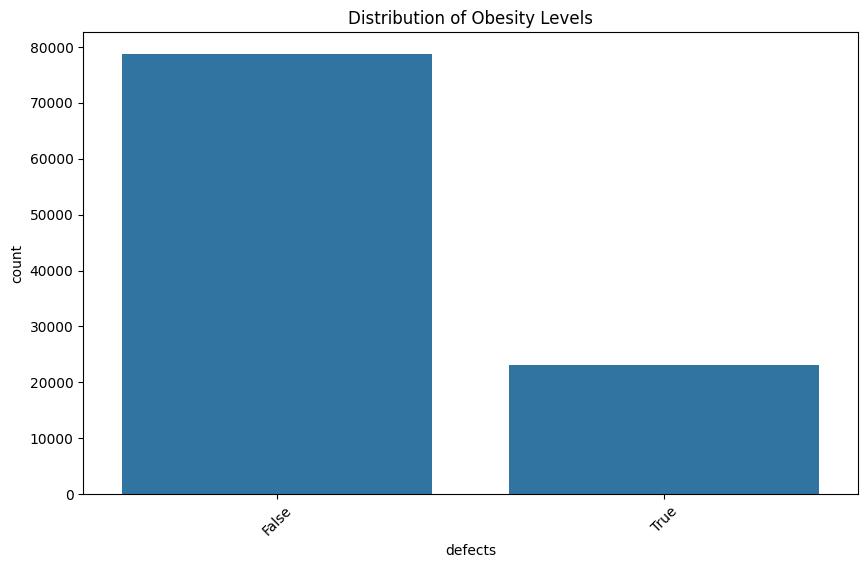

In [ ]:
# EDA
# 1. Distribution of the target variable (NObeyesdad)
plt.figure(figsize=(10, 6))
sns.countplot(x='defects', data=df)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()

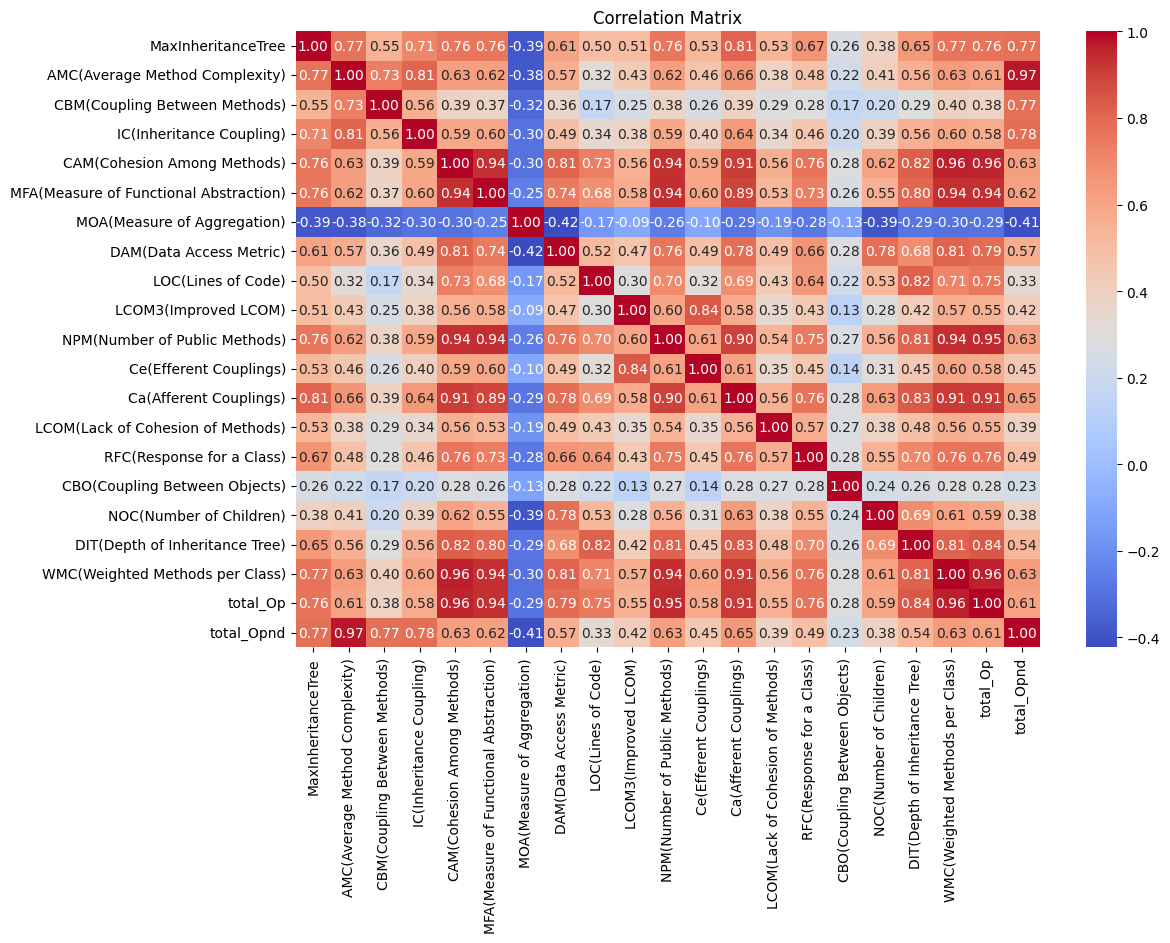

In [ ]:
# 2. Correlation Matrix for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)  # using numeric_only=True due to future deprecation warning
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

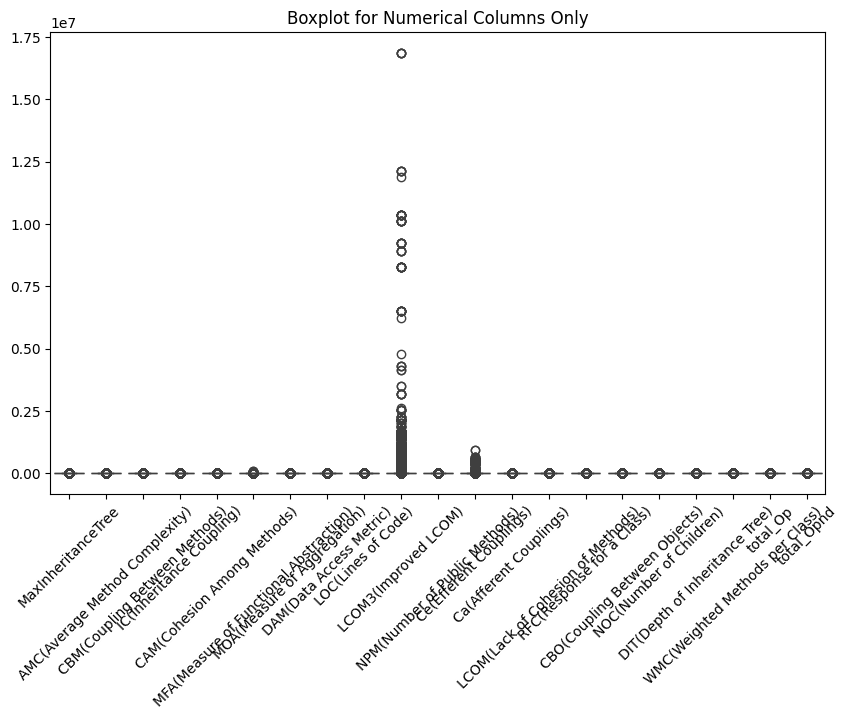

In [ ]:
# Boxplot for numerical columns only
numeric_cols = df.select_dtypes(include='number')  # Select only numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.title("Boxplot for Numerical Columns Only")
plt.xticks(rotation=45)
plt.show()



In [ ]:
df.columns

Index(['MaxInheritanceTree', 'AMC(Average Method Complexity)',
       'CBM(Coupling Between Methods)', 'IC(Inheritance Coupling)',
       'CAM(Cohesion Among Methods)', 'MFA(Measure of Functional Abstraction)',
       'MOA(Measure of Aggregation)', 'DAM(Data Access Metric)',
       'LOC(Lines of Code)', 'LCOM3(Improved LCOM)',
       'NPM(Number of Public Methods)', 'Ce(Efferent Couplings)',
       ' Ca(Afferent Couplings)', 'LCOM(Lack of Cohesion of Methods)',
       'RFC(Response for a Class)', 'CBO(Coupling Between Objects)',
       'NOC(Number of Children)', 'DIT(Depth of Inheritance Tree)',
       'WMC(Weighted Methods per Class)', 'total_Op', 'total_Opnd', 'defects'],
      dtype='object')

In [ ]:
#OUTLIER TREATEMENT
d = pd.DataFrame(df, columns = ['LCOM3(Improved LCOM)'])
Q1 = d['LCOM3(Improved LCOM)'].quantile(0.25)
Q3 = d['LCOM3(Improved LCOM)'].quantile(0.75)
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
lower_cap = d['LCOM3(Improved LCOM)'].quantile(0.05) #lower cap as 5th percentile
upper_cap = d['LCOM3(Improved LCOM)'].quantile(0.95)
df['LCOM3(Improved LCOM)'] = np.where(df['LCOM3(Improved LCOM)'] < lower_cap, lower_cap,
                              np.where(df['LCOM3(Improved LCOM)'] > upper_cap, upper_cap, df['LCOM3(Improved LCOM)']))

e = pd.DataFrame(df, columns = ['Ce(Efferent Couplings)'])
Q1 = e['Ce(Efferent Couplings)'].quantile(0.25)
Q3 = e['Ce(Efferent Couplings)'].quantile(0.75)
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
lower_cap = e['Ce(Efferent Couplings)'].quantile(0.05) #lower cap as 5th percentile
upper_cap = e['Ce(Efferent Couplings)'].quantile(0.95)
df['Ce(Efferent Couplings)'] = np.where(df['Ce(Efferent Couplings)'] < lower_cap, lower_cap,
                              np.where(df['Ce(Efferent Couplings)'] > upper_cap, upper_cap, df['Ce(Efferent Couplings)']))

In [ ]:
df.shape

(169605, 22)

In [ ]:
import pandas as pd

def get_categorical_numerical_columns(df):
    """
    This function takes a pandas DataFrame as input and returns two lists:
    - Categorical column names
    - Numerical column names
    """
    # Categorical columns: dtype 'object', 'category', or boolean
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Numerical columns: dtype 'int64', 'float64'
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    return categorical_columns, numerical_columns

# Example usage:
#df = pd.read_csv('/mnt/data/software_defect_detection.csv')
categorical_cols, numerical_cols = get_categorical_numerical_columns(df)

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['defects']
Numerical Columns: ['MaxInheritanceTree', 'AMC(Average Method Complexity)', 'CBM(Coupling Between Methods)', 'IC(Inheritance Coupling)', 'CAM(Cohesion Among Methods)', 'MFA(Measure of Functional Abstraction)', 'MOA(Measure of Aggregation)', 'DAM(Data Access Metric)', 'LOC(Lines of Code)', 'LCOM3(Improved LCOM)', 'NPM(Number of Public Methods)', 'Ce(Efferent Couplings)', 'Ca(Afferent Couplings)', 'LCOM(Lack of Cohesion of Methods)', 'RFC(Response for a Class)', 'CBO(Coupling Between Objects)', 'NOC(Number of Children)', 'DIT(Depth of Inheritance Tree)', 'WMC(Weighted Methods per Class)', 'total_Op', 'total_Opnd']


In [ ]:

# mode value imputation
mode_value=df[df['defects'].notna()]['defects'].mode()[0]
mode_value
# best alternative of mode value imputation
#df['embarked_mode']=df['embarked'].fillna(jo_sabse_jyada_aa_raha_hai)
df['defects']=df['defects'].fillna(mode_value)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['defects'] = encoder.fit_transform(df["defects"])
df

,MaxInheritanceTree,AMC(Average Method Complexity),CBM(Coupling Between Methods),IC(Inheritance Coupling),CAM(Cohesion Among Methods),MFA(Measure of Functional Abstraction),MOA(Measure of Aggregation),DAM(Data Access Metric),LOC(Lines of Code),LCOM3(Improved LCOM),...,Ca(Afferent Couplings),LCOM(Lack of Cohesion of Methods),RFC(Response for a Class),CBO(Coupling Between Objects),NOC(Number of Children),DIT(Depth of Inheritance Tree),WMC(Weighted Methods per Class),total_Op,total_Opnd,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,8612.32,...,31,0,7,0,14.0,27.0,71.0,54.0,1.0,0
169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,1060.92,...,15,0,3,0,9.0,10.0,23.0,15.0,5.0,0
169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,2160.00,...,18,0,4,0,16.0,16.0,36.0,18.0,3.0,0
169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,2118.30,...,12,0,2,0,8.0,12.0,29.0,22.0,3.0,0


In [ ]:
X = df.drop('defects', axis =1)
y = df['defects']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
p = min_max.fit_transform(X)
X = pd.DataFrame(p,columns=X.columns)
X,y



(        MaxInheritanceTree  AMC(Average Method Complexity)  \
 0                 0.006103                        0.004264   
 1                 0.003778                        0.002132   
 2                 0.002906                        0.002132   
 3                 0.002034                        0.000000   
 4                 0.002906                        0.002132   
 ...                    ...                             ...   
 169600            0.011625                        0.000000   
 169601            0.005522                        0.004264   
 169602            0.006684                        0.002132   
 169603            0.004940                        0.002132   
 169604            0.029061                        0.029851   
 
         CBM(Coupling Between Methods)  IC(Inheritance Coupling)  \
 0                            0.000000                  0.002494   
 1                            0.000000                  0.002494   
 2                            0.000000

In [ ]:
categorical_columns = df.columns[df.dtypes=="object"]
categorical_columns
for col in categorical_columns:
    print(col,df[col].unique())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test

(        MaxInheritanceTree  AMC(Average Method Complexity)  \
 13567             0.002906                        0.000000   
 62211             0.004069                        0.004264   
 94592             0.008718                        0.006397   
 135255            0.001744                        0.000000   
 158938            0.006975                        0.006397   
 ...                    ...                             ...   
 73349             0.003197                        0.000000   
 109259            0.000872                        0.000000   
 50057             0.042139                        0.002132   
 5192              0.010753                        0.012793   
 128037            0.000872                        0.000000   
 
         CBM(Coupling Between Methods)  IC(Inheritance Coupling)  \
 13567                        0.000000                  0.000000   
 62211                        0.012195                  0.002494   
 94592                        0.000000

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135684, 21), (33921, 21), (135684,), (33921,))

In [ ]:
"""
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Data Ingestion
file_path = '/content/software_defect_detection.csv'
data = pd.read_csv(file_path)

# Step 2: Data Cleaning and Handling Missing Values
# Dropping rows with missing target values (defects column)
data_cleaned = data.dropna(subset=['defects'])

# Converting the target variable 'defects' to binary (True/False => 1/0)
data_cleaned['defects'] = data_cleaned['defects'].apply(lambda x: 1 if x == True else 0)

# Dropping unnecessary columns ('Unnamed: 0', 'id')
X = data_cleaned.drop(columns=['defects', 'Unnamed: 0', 'id'])
y = data_cleaned['defects']

# Step 3: Data Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Training using RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)
"""

'\n# Importing necessary libraries\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score\n\n# Step 1: Data Ingestion\nfile_path = \'/content/software_defect_detection.csv\'\ndata = pd.read_csv(file_path)\n\n# Step 2: Data Cleaning and Handling Missing Values\n# Dropping rows with missing target values (defects column)\ndata_cleaned = data.dropna(subset=[\'defects\'])\n\n# Converting the target variable \'defects\' to binary (True/False => 1/0)\ndata_cleaned[\'defects\'] = data_cleaned[\'defects\'].apply(lambda x: 1 if x == True else 0)\n\n# Dropping unnecessary columns (\'Unnamed: 0\', \'id\')\nX = data_cleaned.drop(columns=[\'defects\', \'Unnamed: 0\', \'id\'])\ny = data_cleaned[\'defects\']\n\n# Step 3: Data Normalization\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Step 4: Tra

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge,Lasso


models = {
                #'RandomForestClassifier': RandomForestClassifier(),
                #'LogisticRegression': LogisticRegression(),
                #'DecisionTreeClassifier': DecisionTreeClassifier(),
                #'AdaBoostClassifier':AdaBoostClassifier(),
                #'DecisionTreeClassifier':DecisionTreeClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBClassifier':XGBClassifier(),
                #'GaussianNB':GaussianNB(),
                'SVC':SVC(),
                        }

In [ ]:
from sklearn.metrics import accuracy_score

def model_train_eval(X_train, y_train, X_test, y_test, models):
    evaluation = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_score = accuracy_score(y_test, y_pred)
        evaluation[list(models.keys())[i]] = model_score
    return evaluation

In [ ]:
model_train_eval(X_train, y_train, X_test, y_test, models)

{'GradientBoosting': 0.8633295008991481,
 'XGBClassifier': 0.8611184811768521,
 'SVC': 0.8635358627398957}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, search_type='grid', n_iter=10, cv=5):
    """
    Performs hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

    Parameters:
    - model: The machine learning model to be tuned.
    - param_grid: Dictionary containing hyperparameters to be tuned.
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    - search_type: 'grid' for GridSearchCV or 'random' for RandomizedSearchCV.
    - n_iter: Number of iterations for RandomizedSearchCV (default is 10).
    - cv: Number of cross-validation folds (default is 5).

    Returns:
    - best_model: The model with the best hyperparameters found.
    - best_params: The best hyperparameters found.
    - test_accuracy: Accuracy of the best model on the test set.
    """
    if search_type == 'grid':
        # Grid Search
        search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    elif search_type == 'random':
        # Randomized Search
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter, cv=cv,
                                    scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
    else:
        raise ValueError("search_type must be 'grid' or 'random'")

    # Fit the search on the training data
    search.fit(X_train, y_train)

    # Best model and hyperparameters
    best_model = search.best_estimator_
    best_params = search.best_params_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Best Hyperparameters: {best_params}")
    print(f"Test Accuracy: {test_accuracy}")

    return best_model, best_params, test_accuracy
"""
# Example usage:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model
rf = RandomForestClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning with GridSearchCV
print("GridSearchCV Results:")
best_model_grid, best_params_grid, accuracy_grid = hyperparameter_tuning(rf, param_grid, X_train, y_train, X_test, y_test, search_type='grid')

# Perform hyperparameter tuning with RandomizedSearchCV
print("\nRandomizedSearchCV Results:")
best_model_random, best_params_random, accuracy_random = hyperparameter_tuning(rf, param_grid, X_train, y_train, X_test, y_test, search_type='random', n_iter=10)
"""
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
best_model, best_params, test_accuracy = hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, search_type='grid', n_iter=10, cv=5)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
"""
Consider the Size of the Dataset:

Small datasets might need algorithms that can generalize well (e.g., Naive Bayes, Decision Trees).
Large datasets might require scalable algorithms (e.g., Gradient Boosting, Deep Learning).
"""